<a href="https://colab.research.google.com/github/dtype2100/TIL/blob/master/envelope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install finance-datareader

     |████████████████████████████████| 48 kB 2.5 MB/s 


In [ ]:
pip install plotly

In [ ]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [ ]:
import os
import pandas as pd
sp_data_dict = dict()
for file_name in os.listdir("/content/drive/MyDrive/Colab Notebooks/Final/stock_data/celltrion/"):
    sp_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Final/stock_data/celltrion/" + file_name,
                          parse_dates = ['Date'])
    stock_name = file_name.replace('.csv', '')
    sp_data_dict[stock_name] = sp_data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
env_data_dict = dict()
for stock_name in sp_data_dict.keys():
    # 데이터 정의
    sp_data = sp_data_dict[stock_name]
    env_data = sp_data.copy() # sp_data 복제
    low_price = env_data["Low"].values
    high_price = env_data["High"].values
    for n in [5, 10, 20]:
        env_data["MA_" + str(n)] = env_data["Close"].rolling(n).mean()
        for a in [0.05, 0.1, 0.15, 0.2]:
            env_data["지지선_{}_{}".format(n, a)] = env_data["MA_" + str(n)] * (1-a)
            env_data["저항선_{}_{}".format(n, a)] = env_data["MA_" + str(n)] * (1+a)
    env_data_dict[stock_name] = env_data

In [ ]:
env_data.tail()

,Date,Open,High,Low,Close,Volume,Change,MA_5,지지선_5_0.05,저항선_5_0.05,...,저항선_10_0.2,MA_20,지지선_20_0.05,저항선_20_0.05,지지선_20_0.1,저항선_20_0.1,지지선_20_0.15,저항선_20_0.15,지지선_20_0.2,저항선_20_0.2
303,2022-03-28,165500,169000,164500,168000,404844,0.015106,167800.0,159410.0,176190.0,...,210360.0,171325.0,162758.75,179891.25,154192.5,188457.5,145626.25,197023.75,137060.0,205590.0
304,2022-03-29,169000,171500,168500,170500,408739,0.014881,168300.0,159885.0,176715.0,...,209220.0,172075.0,163471.25,180678.75,154867.5,189282.5,146263.75,197886.25,137660.0,206490.0
305,2022-03-30,172000,175000,170000,174000,511635,0.020528,169200.0,160740.0,177660.0,...,208380.0,172800.0,164160.00,181440.00,155520.0,190080.0,146880.00,198720.00,138240.0,207360.0
306,2022-03-31,174500,175500,170000,171500,374991,-0.014368,169900.0,161405.0,178395.0,...,206700.0,173425.0,164753.75,182096.25,156082.5,190767.5,147411.25,199438.75,138740.0,208110.0
307,2022-04-01,170000,170500,168500,169000,292355,-0.014577,170600.0,162070.0,179130.0,...,204600.0,173325.0,164658.75,181991.25,155992.5,190657.5,147326.25,199323.75,138660.0,207990.0


# matplot

Text(0.5, 0, '날짜')

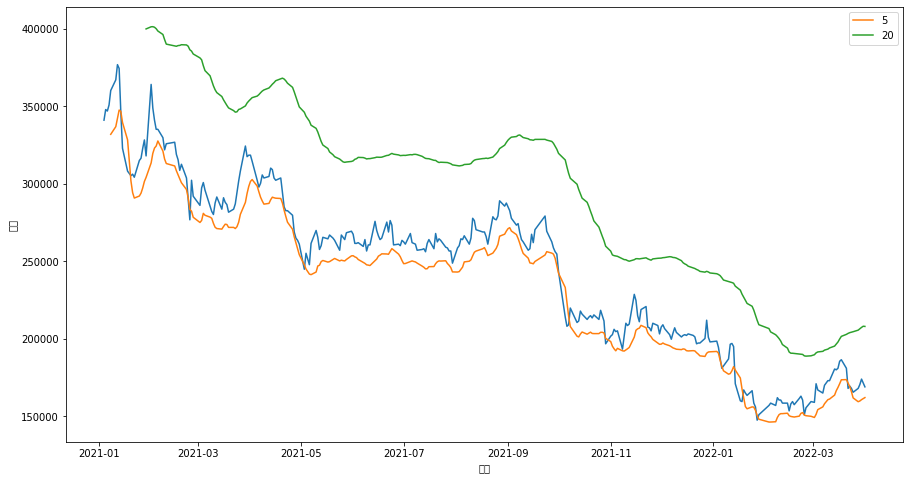

In [ ]:
plt.figure(figsize = (15, 8))

z = plt.plot(env_data['Date'], env_data['Close'])

x = plt.plot(env_data['Date'], env_data['지지선_5_0.05'], label = "5")
y = plt.plot(env_data['Date'], env_data['저항선_20_0.2'], label = "20")


# plt.fill_between(z['Close'], color='lightgray', alpha=0.5)


plt.legend()
plt.ylabel("주가")
plt.xlabel("날짜")


# plotly 

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Candlestick(x=env_data.index,
                              open=env_data['Open'],
                              high=env_data['High'],
                              low=env_data['Low'],
                              close=env_data['Close'],
                              increasing_line_color = 'red',
                              decreasing_line_color = 'blue'
                              ))

In [ ]:
fig.add_trace(go.Scatter(x=env_data['Date'].index, y=env_data['지지선_5_0.05'], marker_color='green', name = "5"))
fig.add_trace(go.Scatter(x=env_data['Date'].index, y=env_data['저항선_20_0.2'], marker_color='orange', name = "20"))

fig.add_trace(go.Bar(x=env_data.index, y=env_data['Volume'], name='Volume'),secondary_y=True)
fig.update_yaxes(range=[0,20000000],secondary_y=True)
fig.update_yaxes(visible=False, secondary_y=True)

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()